<a href="https://www.kaggle.com/code/vijays140291/workplace-type-prediction?scriptVersionId=161635119" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
df=pd.read_csv('/kaggle/input/job-postings-dataset/job_data_merged_1.csv')
df.head()

,Unnamed: 0,Category,Workplace,Location,Department,Type
0,0,Business Analyst,Remote,United Kingdom,Operations,Full time
1,1,Business Analyst,Remote,"Makati, Metro Manila, Philippines",Aux HQ,Full time
2,2,Business Analyst,On-site,"Al-Dajeej, Al Farwaniyah Governorate, Kuwait",PWC Technologies,Full time
3,3,Business Analyst,On-site,"London, England, United Kingdom","Consultants, Advisory",Full time
4,4,Business Analyst,Remote,United Kingdom,Operations,Full time


In [3]:
df=df.drop(df.columns[0],axis=1)

In [4]:
df

,Category,Workplace,Location,Department,Type
0,Business Analyst,Remote,United Kingdom,Operations,Full time
1,Business Analyst,Remote,"Makati, Metro Manila, Philippines",Aux HQ,Full time
2,Business Analyst,On-site,"Al-Dajeej, Al Farwaniyah Governorate, Kuwait",PWC Technologies,Full time
3,Business Analyst,On-site,"London, England, United Kingdom","Consultants, Advisory",Full time
4,Business Analyst,Remote,United Kingdom,Operations,Full time
...,...,...,...,...,...
1090,UI/UX,Remote,"Paris, Île-de-France, France",Content,Other
1091,UI/UX,Remote,"Athens, Attica, Greece",Engineering,Full time
1092,UI/UX,On-site,"Bulverde, Texas, United States",Marketing,Full time
1093,UI/UX,On-site,"Amsterdam, North Holland, Netherlands","Marketing, Communications and Events",Full time


# Exploratory Data Analysis

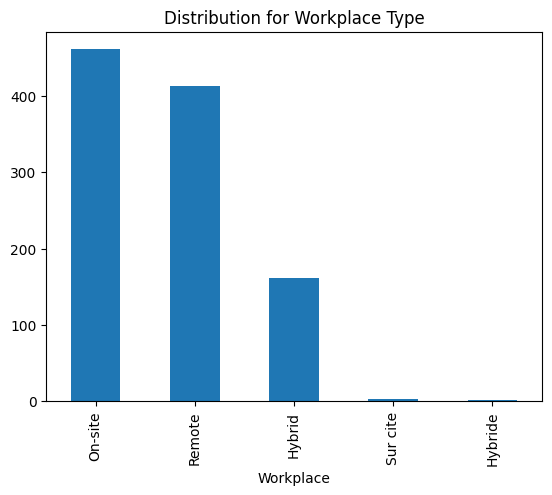

In [5]:
df['Workplace'].value_counts().plot(kind='bar')
plt.title('Distribution for Workplace Type')
plt.show()

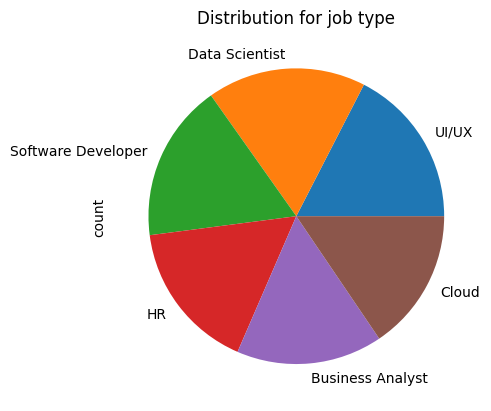

In [6]:
df['Category'].value_counts().plot(kind='pie')
plt.title('Distribution for job type')
plt.show()

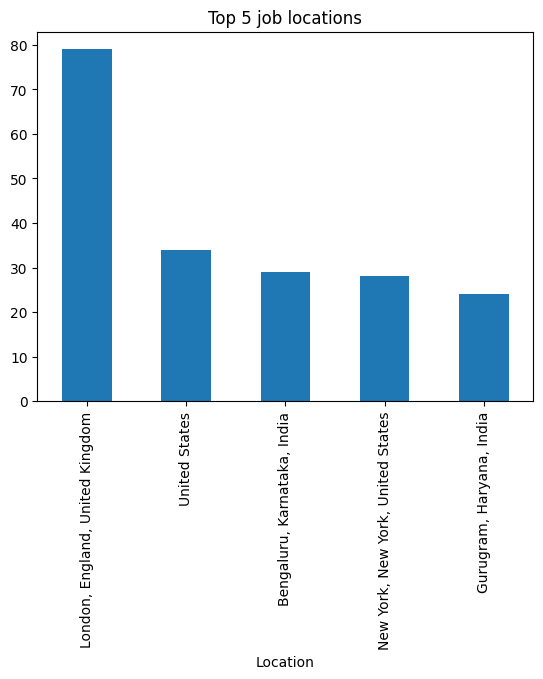

In [7]:
df['Location'].value_counts().head().plot(kind='bar')
plt.title('Top 5 job locations')
plt.show()

In [8]:
len(df['Department'].value_counts())

274

In [9]:
df

,Category,Workplace,Location,Department,Type
0,Business Analyst,Remote,United Kingdom,Operations,Full time
1,Business Analyst,Remote,"Makati, Metro Manila, Philippines",Aux HQ,Full time
2,Business Analyst,On-site,"Al-Dajeej, Al Farwaniyah Governorate, Kuwait",PWC Technologies,Full time
3,Business Analyst,On-site,"London, England, United Kingdom","Consultants, Advisory",Full time
4,Business Analyst,Remote,United Kingdom,Operations,Full time
...,...,...,...,...,...
1090,UI/UX,Remote,"Paris, Île-de-France, France",Content,Other
1091,UI/UX,Remote,"Athens, Attica, Greece",Engineering,Full time
1092,UI/UX,On-site,"Bulverde, Texas, United States",Marketing,Full time
1093,UI/UX,On-site,"Amsterdam, North Holland, Netherlands","Marketing, Communications and Events",Full time


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Category    1095 non-null   object
 1   Workplace   1039 non-null   object
 2   Location    1027 non-null   object
 3   Department  929 non-null    object
 4   Type        926 non-null    object
dtypes: object(5)
memory usage: 42.9+ KB


# Trying to predict the type of workplace based on given features

In [11]:
#creating function to onehot encode the categorical columns
def onehot_encode(df,columns):
    for column in df.columns:
        dummies=pd.get_dummies(df[column],prefix=column)
        df=pd.concat([df,dummies],axis=1)
        df=df.drop(column,axis=1)
    return df
    

In [12]:
#filling the missing values with mode of that column
for column in df.columns:
    df[column]=df[column].fillna(df[column].mode()[0])

In [13]:
df=df.drop(df['Workplace'][df['Workplace']=='Sur cite'].index,axis=0).reset_index(drop=True)

In [14]:
df['Workplace']=df['Workplace'].replace({'Hybride':'Hybrid'})

In [15]:
df['Workplace']=df['Workplace'].replace({'On-site':0,'Remote':1,'Hybrid':2})

/tmp/ipykernel_18/2317532731.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Workplace']=df['Workplace'].replace({'On-site':0,'Remote':1,'Hybrid':2})


In [16]:
#splitting the dataset
y=df['Workplace']
x=df.drop('Workplace',axis=1)

In [17]:
y.value_counts()

Workplace
0    517
1    413
2    162
Name: count, dtype: int64

In [18]:
#encoding the feature

x=onehot_encode(x,x.columns)

In [19]:
x=x.astype(int)

In [20]:
x

,Category_Business Analyst,Category_Cloud,Category_Data Scientist,Category_HR,Category_Software Developer,Category_UI/UX,"Location_Ahmedabad, Gujarat, India","Location_Aiea, Hawaii, United States","Location_Al-Dajeej, Al Farwaniyah Governorate, Kuwait","Location_Alpharetta, Georgia, United States",...,Department_epay,Department_information Technology,Department_Αθήνα,Department_🔵,Type_Contract,Type_Full time,Type_Other,Type_Part time,Type_Temporary,Type_Temps plein
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1088,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1089,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1090,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [21]:
#scaling the dataset
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns,index=x.index)

In [22]:
x

,Category_Business Analyst,Category_Cloud,Category_Data Scientist,Category_HR,Category_Software Developer,Category_UI/UX,"Location_Ahmedabad, Gujarat, India","Location_Aiea, Hawaii, United States","Location_Al-Dajeej, Al Farwaniyah Governorate, Kuwait","Location_Alpharetta, Georgia, United States",...,Department_epay,Department_information Technology,Department_Αθήνα,Department_🔵,Type_Contract,Type_Full time,Type_Other,Type_Part time,Type_Temporary,Type_Temps plein
0,2.289105,-0.429397,-0.458959,-0.444262,-0.453098,-0.460420,-0.030275,-0.042835,-0.067822,-0.030275,...,-0.042835,-0.030275,-0.030275,-0.030275,-0.19245,0.275431,-0.113961,-0.096136,-0.109764,-0.030275
1,2.289105,-0.429397,-0.458959,-0.444262,-0.453098,-0.460420,-0.030275,-0.042835,-0.067822,-0.030275,...,-0.042835,-0.030275,-0.030275,-0.030275,-0.19245,0.275431,-0.113961,-0.096136,-0.109764,-0.030275
2,2.289105,-0.429397,-0.458959,-0.444262,-0.453098,-0.460420,-0.030275,-0.042835,14.744490,-0.030275,...,-0.042835,-0.030275,-0.030275,-0.030275,-0.19245,0.275431,-0.113961,-0.096136,-0.109764,-0.030275
3,2.289105,-0.429397,-0.458959,-0.444262,-0.453098,-0.460420,-0.030275,-0.042835,-0.067822,-0.030275,...,-0.042835,-0.030275,-0.030275,-0.030275,-0.19245,0.275431,-0.113961,-0.096136,-0.109764,-0.030275
4,2.289105,-0.429397,-0.458959,-0.444262,-0.453098,-0.460420,-0.030275,-0.042835,-0.067822,-0.030275,...,-0.042835,-0.030275,-0.030275,-0.030275,-0.19245,0.275431,-0.113961,-0.096136,-0.109764,-0.030275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,-0.436852,-0.429397,-0.458959,-0.444262,-0.453098,2.171929,-0.030275,-0.042835,-0.067822,-0.030275,...,-0.042835,-0.030275,-0.030275,-0.030275,-0.19245,-3.630677,8.774964,-0.096136,-0.109764,-0.030275
1088,-0.436852,-0.429397,-0.458959,-0.444262,-0.453098,2.171929,-0.030275,-0.042835,-0.067822,-0.030275,...,-0.042835,-0.030275,-0.030275,-0.030275,-0.19245,0.275431,-0.113961,-0.096136,-0.109764,-0.030275
1089,-0.436852,-0.429397,-0.458959,-0.444262,-0.453098,2.171929,-0.030275,-0.042835,-0.067822,-0.030275,...,-0.042835,-0.030275,-0.030275,-0.030275,-0.19245,0.275431,-0.113961,-0.096136,-0.109764,-0.030275
1090,-0.436852,-0.429397,-0.458959,-0.444262,-0.453098,2.171929,-0.030275,-0.042835,-0.067822,-0.030275,...,-0.042835,-0.030275,-0.030275,-0.030275,-0.19245,0.275431,-0.113961,-0.096136,-0.109764,-0.030275


In [23]:
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.72,random_state=1223)

In [24]:
models={'Decision Tree':DecisionTreeClassifier(),
          'RandomForestClassifier':RandomForestClassifier(),
          'Logistic Regression':LogisticRegression()}

In [25]:
for name,model in models.items():
    model.fit(x_train,y_train)
    
    print(f'The accuracy of {name}',model.score(x_test,y_test))

The accuracy of Decision Tree 0.7745098039215687
The accuracy of RandomForestClassifier 0.7745098039215687
The accuracy of Logistic Regression 0.7777777777777778


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
model=LogisticRegression()
model.fit(x_train,y_train)
prediction=model.predict(x_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
cm=confusion_matrix(y_test,prediction)

In [28]:
print(cm)

[[115  18   3]
 [ 20  98   3]
 [ 20   4  25]]


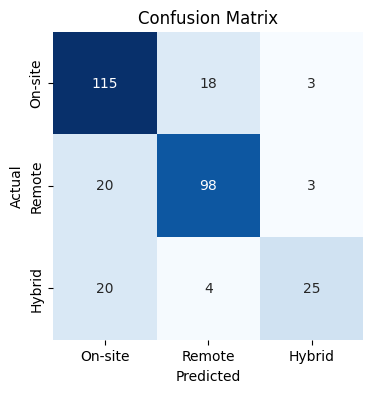

In [29]:
#ploting confusion matrix 
plt.figure(figsize=(4,4))
sns.heatmap(cm,annot=True,fmt='g',cbar=False,cmap='Blues')
plt.xticks(np.arange(3)+0.5,['On-site', 'Remote','Hybrid'])
plt.yticks(np.arange(3)+0.5,['On-site', 'Remote','Hybrid'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [30]:
y_test.value_counts()

Workplace
0    136
1    121
2     49
Name: count, dtype: int64